In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from IPython.display import Image  
from subprocess import call

In [6]:
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# You can also drop whichever other columns you'd like here
titanic_df.drop("Cabin", axis=1, inplace=True)
titanic_df.drop("PassengerId", axis=1, inplace=True)
titanic_df.drop("Name", axis=1, inplace=True)
titanic_df.drop("Ticket", axis=1, inplace=True)
titanic_df.dropna()
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### One-Hot Encoding
One-hot encoding is a technique used to ensure that categorical variables are better represented in the machine. Let's take a look at the "Sex" column

In [9]:
titanic_df["Sex"].unique()

array(['male', 'female'], dtype=object)

In [10]:
titanic_df["Pclass"].unique()

array([3, 1, 2], dtype=int64)

In [11]:
titanic_df["Parch"].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [12]:
titanic_df["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

Machine Learning classifiers don't know how to handle strings. As a result, you need to convert it into a categorical representation. There are two main ways to go about this:

Label Encoding: Assigning, for example, 0 for "male" and 1 for "female". The problem here is it intrinsically makes one category "larger than" the other category.

One-hot encoding: Assigning, for example, [1, 0] for "male" and [0, 1] for female. In this case, you have an array of size (n_categories,) and you represent a 1 in the correct index, and 0 elsewhere. In Pandas, this would show as extra columns. For example, rather than having a "Sex" column, it would be a "Sex_male" and "Sex_female" column. Then, if the person is male, it would simply show as a 1 in the "Sex_male" column and a 0 in the "Sex_female" column.

There is a nice and easy method that does this in pandas: get_dummies()

In [13]:
titanic_df = pd.get_dummies(titanic_df, prefix="Sex", columns=["Sex"])
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,S,False,True
1,1,1,38.0,1,0,71.2833,C,True,False
2,1,3,26.0,0,0,7.9250,S,True,False
3,1,1,35.0,1,0,53.1000,S,True,False
4,0,3,35.0,0,0,8.0500,S,False,True


Now, we do the same to the "Embarked" column.

In [14]:
titanic_df = pd.get_dummies(titanic_df, prefix="Embarked", columns=["Embarked"])
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,1,38.0,1,0,71.2833,True,False,True,False,False
2,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,1,35.0,1,0,53.1000,True,False,False,False,True
4,0,3,35.0,0,0,8.0500,False,True,False,False,True


Do the same with "Pclass".

In [15]:
titanic_df = pd.get_dummies(titanic_df, prefix="Pclass", columns=["Pclass"])
titanic_df.head()

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,False,True,False,False,True,False,False,True
1,1,38.0,1,0,71.2833,True,False,True,False,False,True,False,False
2,1,26.0,0,0,7.9250,True,False,False,False,True,False,False,True
3,1,35.0,1,0,53.1000,True,False,False,False,True,True,False,False
4,0,35.0,0,0,8.0500,False,True,False,False,True,False,False,True


In [16]:
column_names = list(titanic_df.columns.values)
column_names

['Survived',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Sex_female',
 'Sex_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3']

In [17]:
titanic_df.replace(True, 1, inplace=True)
titanic_df.replace(False, 0, inplace=True)
titanic_df.head()

C:\Users\bbrow\AppData\Local\Temp\ipykernel_4940\2333181782.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic_df.replace(False, 0, inplace=True)


,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0
2,1,26.0,0,0,7.9250,1,0,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1,1,0,0
4,0,35.0,0,0,8.0500,0,1,0,0,1,0,0,1


In [18]:
X = titanic_df.iloc[:, 1:].values
y = titanic_df.iloc[:, 0].values

r = 11

# Split data into train and test
X_train_full, X_test, y_train_full, y_test = train_test_split(X, 
                y, test_size=0.2, random_state=r)

# Split train into smaller train and development sets
X_train, X_dev, y_train, y_dev = train_test_split(X_train_full,
y_train_full, test_size=0.2, random_state=r)

In [19]:
unlimited_depth = DecisionTreeClassifier(max_depth=None, random_state=r)
unlimited_depth.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

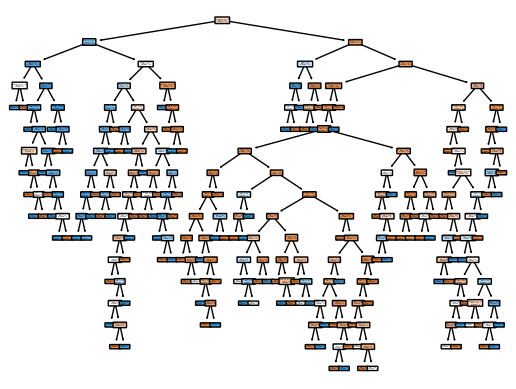

In [20]:
fig = plt.figure()
tree.plot_tree(unlimited_depth, feature_names = column_names, rounded = True, proportion = False, precision = 2, filled = True)
fig.savefig('unlimited_tree.png')

In [21]:
score = unlimited_depth.score(X_dev, y_dev)
print("The accuracy on the development set is: ", score)

The accuracy on the development set is:  0.7762237762237763


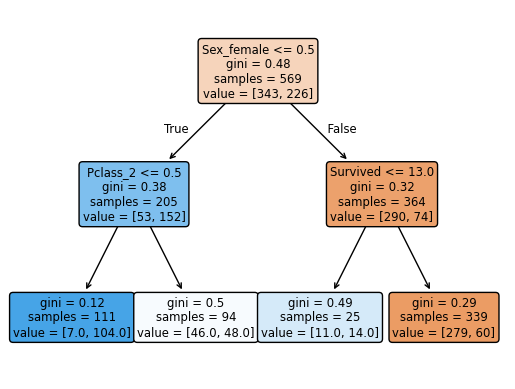

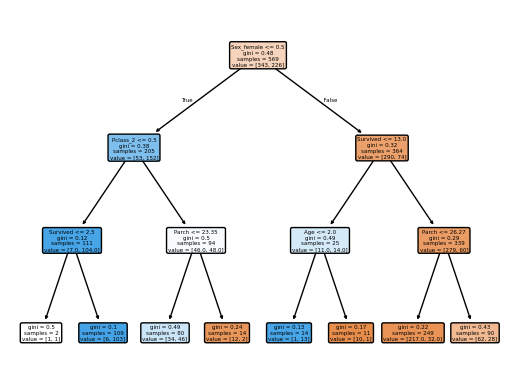

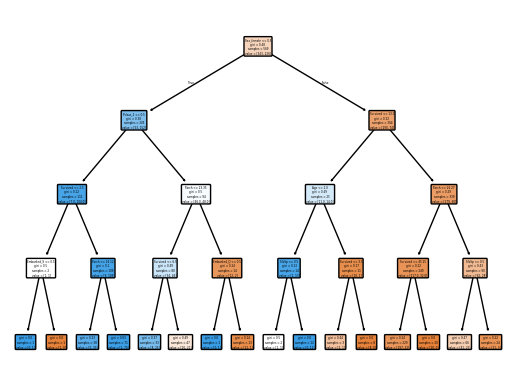

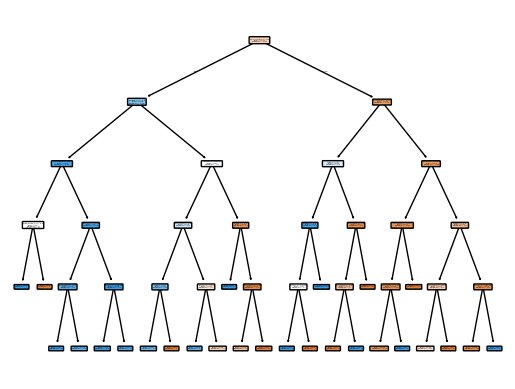

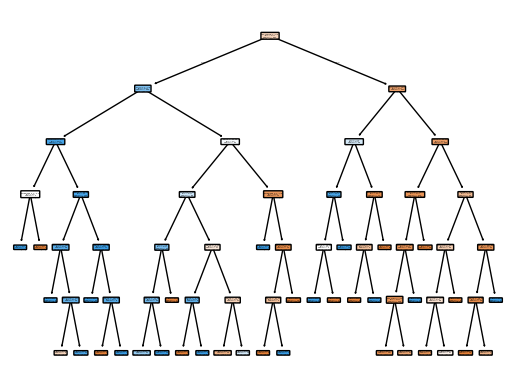

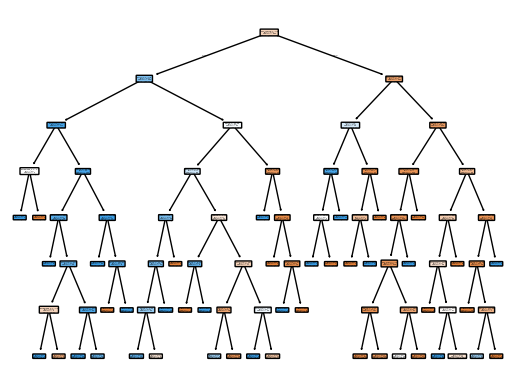

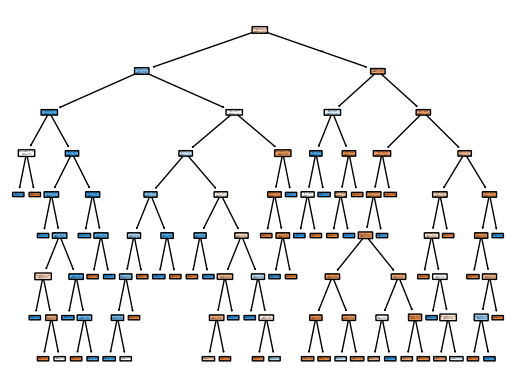

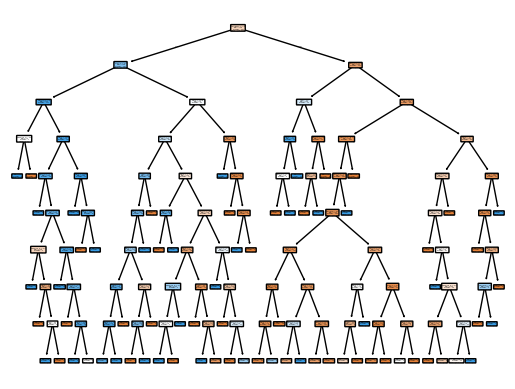

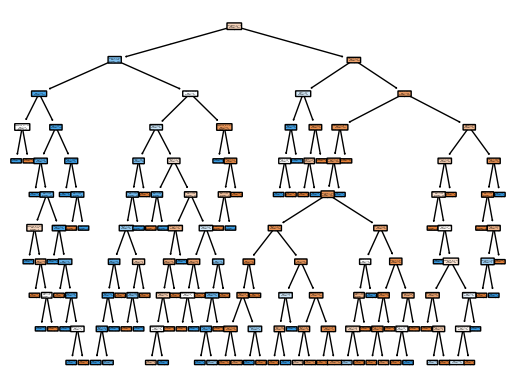

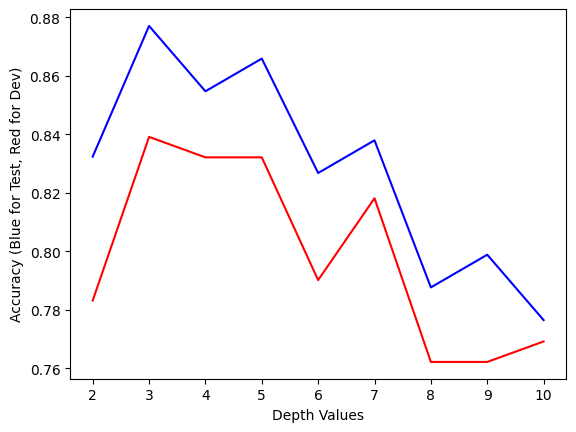

In [22]:
depths = range(2, 11)

dev_scores = [] 
test_scores = []
for i in depths:
    clf = DecisionTreeClassifier(max_depth=i, random_state=r)
    clf.fit(X_train, y_train)
    fig = plt.figure()
    tree.plot_tree(clf, feature_names = column_names, rounded = True, proportion = False, precision = 2, filled = True)
    fig.savefig(f"tree_depth_{i}.png")
    score_test = clf.score(X_test, y_test)
    score_dev = clf.score(X_dev, y_dev)
    dev_scores.append(score_dev)
    test_scores.append(score_test)
    
fig, ax = plt.subplots()
ax.plot(depths, dev_scores, color = "red")
ax.plot(depths, test_scores, color = "blue")
plt.xlabel("Depth Values")
plt.ylabel("Accuracy (Blue for Test, Red for Dev)")
ax.xaxis.set_ticks(depths)
plt.show()

The model was most accurate on the test and development data at three depth, meaning a depth of three should be chosen for this model.

In [23]:
depth_5 = DecisionTreeClassifier(max_depth=3, random_state=r)
depth_5.fit(X_train_full, y_train_full)
score = depth_5.score(X_test, y_test)
print(f"Final model has an accuracy of {score} on the test data")

Final model has an accuracy of 0.8770949720670391 on the test data


This is much higher than the ~ 78% accuracy when initially tested on the training data.

In [24]:
# Random forest modules
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

In [25]:
# Bagged tree generation
base = DecisionTreeClassifier(max_depth = 3, random_state = r)
ensemble = BaggingClassifier(estimator = base, n_estimators = 100, random_state = r)

base.fit(X_train_full, y_train_full)
ensemble.fit(X_train_full, y_train_full)

print("Accuracy of base is: ", base.score(X_test, y_test))
print("Accuracy of ensemble is: ", ensemble.score(X_test, y_test))

Accuracy of base is:  0.8770949720670391
Accuracy of ensemble is:  0.88268156424581


In [30]:
# Random forest generation
forest = RandomForestClassifier(n_estimators=100, random_state=r)
forest.fit(X_train_full, y_train_full)
print("Accuracy of this random forest method is: ", forest.score(X_test, y_test))
print("\n", "Importance")
feature_importance = pd.Series(forest.feature_importances_).sort_values(ascending=False)
feature_importance

Accuracy of this random forest method is:  0.8379888268156425

 Importance


0     0.272241
3     0.245713
5     0.133933
4     0.121476
11    0.055702
1     0.051529
2     0.037977
9     0.028952
8     0.016444
10    0.015011
6     0.011616
7     0.009405
dtype: float64

In [31]:
print("The most important feature in deciding if a passenger is likely to survive is", titanic_df.columns.values[3])

The most important feature in deciding if a passenger is likely to survive is Parch


In [32]:
# Boosted tree
boosted = HistGradientBoostingClassifier()
boosted.fit(X_train_full, y_train_full)
print("Accuracy of boosted tree is: ", boosted.score(X_test, y_test))

Accuracy of boosted tree is:  0.888268156424581


Will use random forest method.

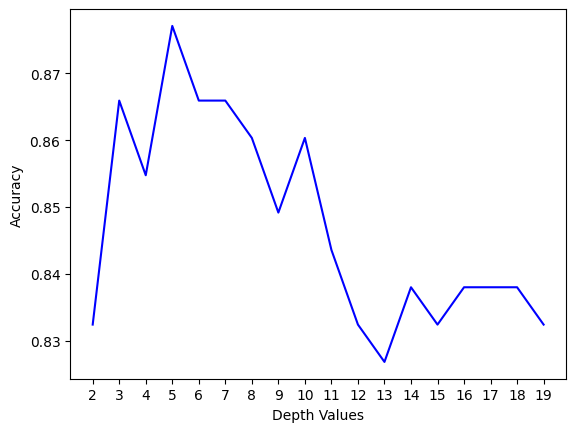

In [33]:
depths = range(2, 20)

test_scores = []

for i in depths:
    forest = RandomForestClassifier(max_depth = i, n_estimators=100, random_state=r)
    forest.fit(X_train_full, y_train_full)
    score_test = forest.score(X_test, y_test)
    test_scores.append(score_test)

fig, ax = plt.subplots()
ax.plot(depths, test_scores, color = "blue")
plt.xlabel("Depth Values")
plt.ylabel("Accuracy")
ax.xaxis.set_ticks(depths)
plt.show()

Five is optimal depth for random forest method.

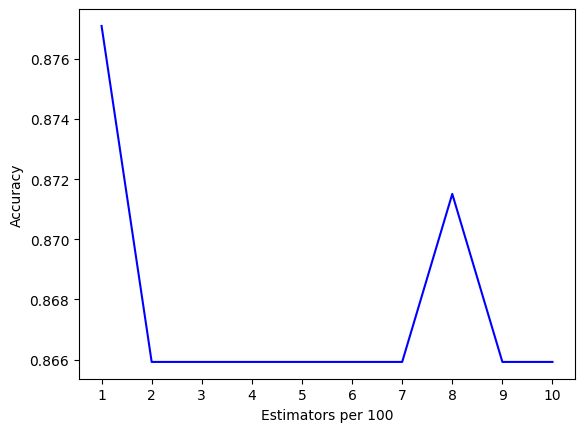

In [35]:
estimators = range(1,11)

test_scores = []

for i in estimators:
    forest = RandomForestClassifier(max_depth = 5, n_estimators=100*i, random_state=r)
    forest.fit(X_train_full, y_train_full)
    score_test = forest.score(X_test, y_test)
    test_scores.append(score_test)

fig, ax = plt.subplots()
ax.plot(estimators, test_scores, color = "blue")
plt.xlabel("Estimators per 100")
plt.ylabel("Accuracy")
ax.xaxis.set_ticks(estimators)
plt.show()

Some estimator value of less than of equal to 100 is optimal.

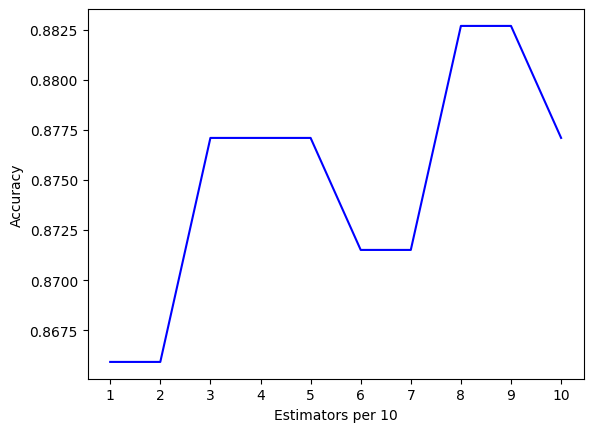

In [36]:
estimators = range(1,11)

test_scores = []

for i in estimators:
    forest = RandomForestClassifier(max_depth = 5, n_estimators=10*i, random_state=r)
    forest.fit(X_train_full, y_train_full)
    score_test = forest.score(X_test, y_test)
    test_scores.append(score_test)

fig, ax = plt.subplots()
ax.plot(estimators, test_scores, color = "blue")
plt.xlabel("Estimators per 10")
plt.ylabel("Accuracy")
ax.xaxis.set_ticks(estimators)
plt.show()

An estimator value of 80 is optimal.

In [37]:
forest = RandomForestClassifier(max_depth = 5, n_estimators=80, random_state=r)
forest.fit(X_train_full, y_train_full)
score = forest.score(X_test, y_test)
print("Accuracy for final model is", score)

Accuracy for final model is 0.88268156424581
